In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
np.random.seed(42)
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train=pd.read_csv('train.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
test=pd.read_csv('test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [60]:
train["SalePrice"]

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

Explanatory Data Analysis

Data wrangling and manipulation

Data Understanding

In [4]:
train.shape

(1460, 81)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

There are 1460 columns in the dataset.Some values have nan values which means they have empty vales.

Our target variable Saleprice luckly has zero null values thus this wont be affecting our ML model

Some variables however,have etremely few non-null values.We can gather very limited insights from them and therefor drop them.

In [6]:
#we drop values that have extremely few non-null values
train.drop(['Alley','FireplaceQu','PoolQC','MiscFeature','Fence'],axis=1,inplace=True)


In [15]:
train.drop(['MiscVal'],axis=1,inplace=True)

In [16]:
print(train.shape)

(1460, 75)


We have 75 columns to work with

In [17]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,12.000000,2010.000000,755000.000000


This shows the summary statistics of numerical columns

There are 37 columns with numerical values.

From the staistical summary we see the:
   number of rows in a variable which are not-null
   mean of the vaiables
   standard deviation of the variable
   the minimum value of the variable
   the quantiles
   the maximum value in the variable



In [18]:

#lets see the sum of null values
train.isnull().sum()


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 75, dtype: int64

Most of the columns do not have null values

We analyse the data to choose a method for filling the null values

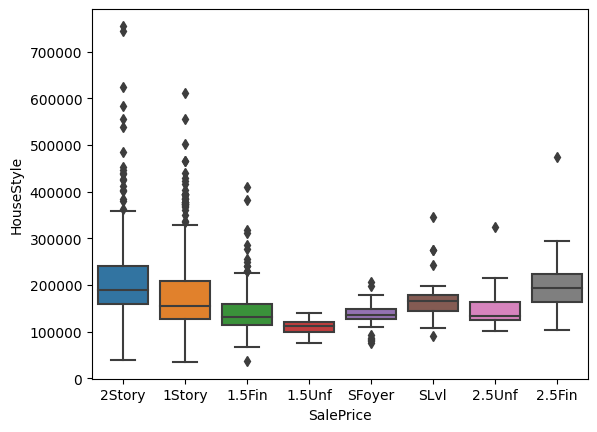

In [12]:
sns.boxplot(data=train,x='HouseStyle',y='SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('HouseStyle')
plt.show()

We can see that tha the dataset has outliers thus the mean wont be suitable for replacing the null values.

In [14]:
#skewness
train['SalePrice'].skew()

1.8828757597682129

We can see some skewness and since relapcing missing values with mode works for both numerical and categorical values we use the mode.
#median works only with numerical features

In [19]:
#There's skweeness, we use the mode to handle the missing values
train=train.fillna(train.mode().iloc[0])

In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

We have handled missing values

Lets Understand the target variable

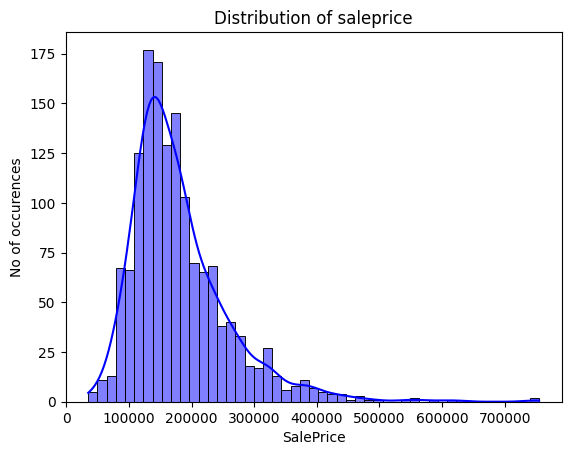

In [17]:
plt.title('Distribution of saleprice')
sns.histplot(data=train,x='SalePrice',kde=True,color='Blue')
plt.xlabel('SalePrice')
plt.ylabel('No of occurences')
plt.show()

The saleprice has a normal distribution

In [21]:
train['SalePrice'].kurt()

6.536281860064529

The saleprice is leptokurtic since it has a kurtosis of >3(6.5)

Lets check the correaltion of each variable with target variable to decide the most relevant features of the dataset

<AxesSubplot: >

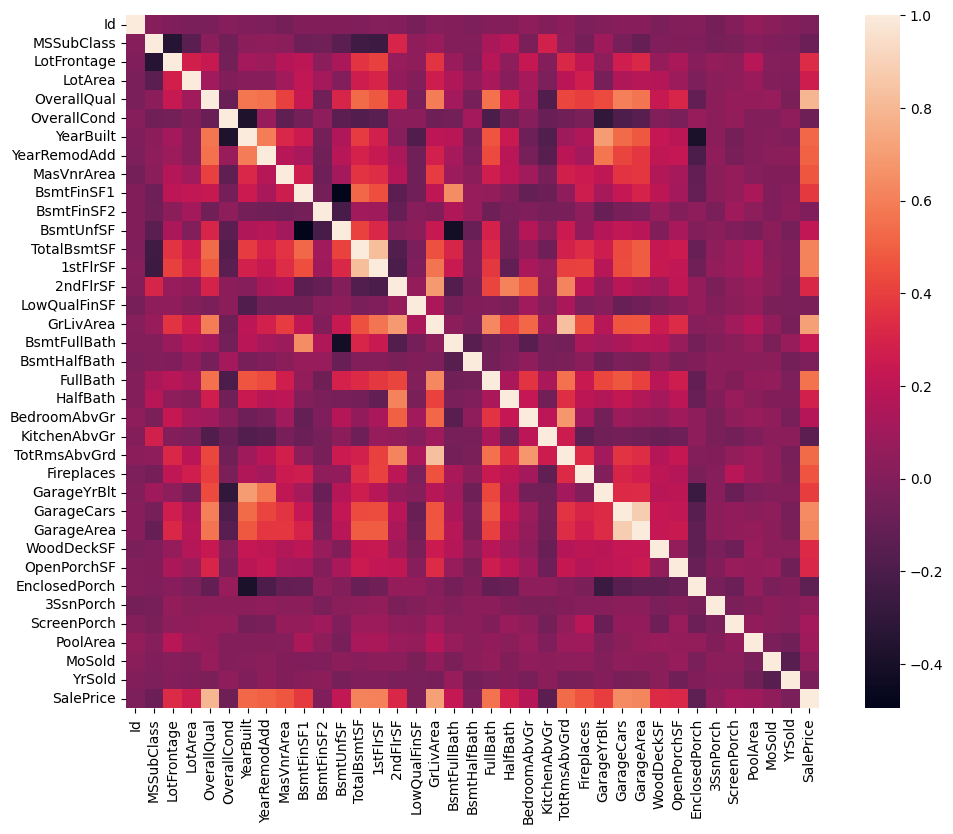

In [22]:
plt.subplots(figsize=(12,9))
sns.heatmap(train.corr(),square=True)

From the matrix we identify the following variable that 
have a high correlation with the target variable

OverallQual,GrlivArea,1stFlrSF,GarageCars,GarageArea and TotalBmstSF

In [23]:
def vars_corrHigh(dataframe,target_var):
    cor_matrix=dataframe.corr(numeric_only=True)
    vars=cor_matrix[abs(cor_matrix[target_var])> 0.5].index.tolist()
    vars=vars + (cor_matrix[abs(cor_matrix[target_var])<= -0.5].index.tolist())

    return vars

target='SalePrice'
var_list=vars_corrHigh(train,target)
print(var_list)
print(len(var_list))

['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']
11


We will consider the above 10 columns that are highly correlated with the target variable hence dropping the rest columns

In [24]:
house_data=train[var_list]
print(house_data.columns)
var_list1=var_list.pop()

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [25]:
test_data=test[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea']]

In [26]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1458 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1458 non-null   float64
 9   GarageArea    1458 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [28]:
test_data.fillna(test_data.mean(),inplace=True)

In [29]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   YearBuilt     1459 non-null   int64  
 2   YearRemodAdd  1459 non-null   int64  
 3   TotalBsmtSF   1459 non-null   float64
 4   1stFlrSF      1459 non-null   int64  
 5   GrLivArea     1459 non-null   int64  
 6   FullBath      1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   GarageCars    1459 non-null   float64
 9   GarageArea    1459 non-null   float64
dtypes: float64(3), int64(7)
memory usage: 114.1 KB


In [30]:
house_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000


We've lost all the categorical values

Lets view the correlation matix

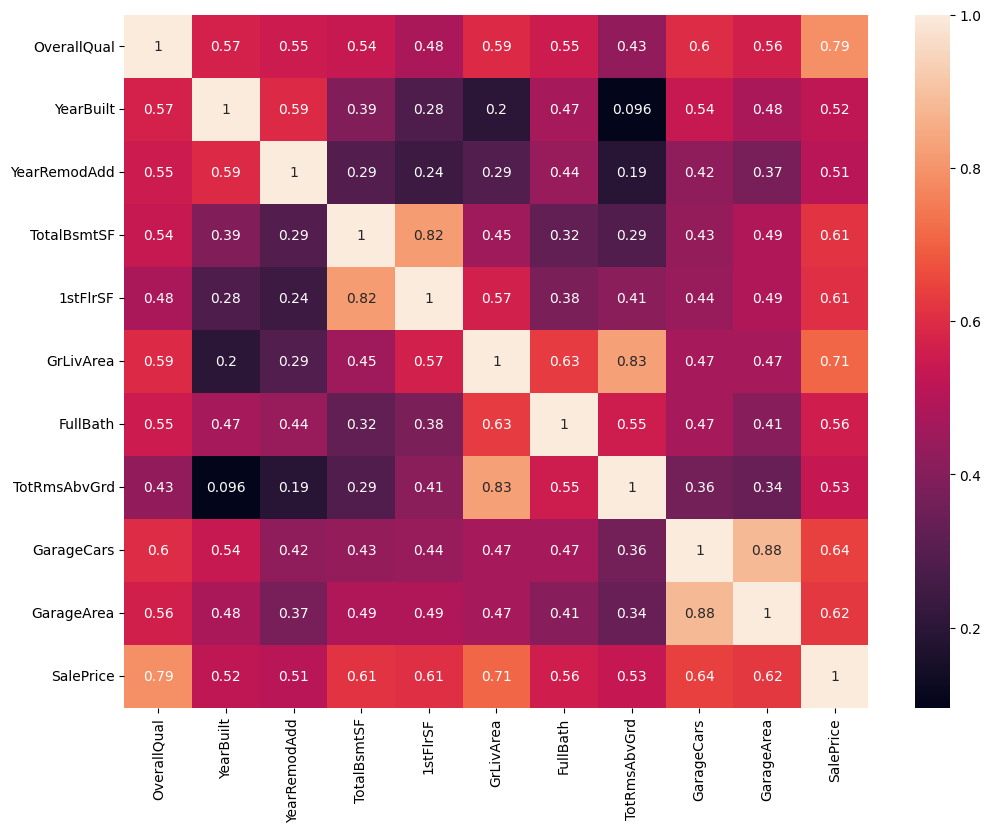

In [32]:
plt.subplots(figsize=(12,9))
sns.heatmap(house_data.corr(),annot=True)
plt.show()

Here the correlation matrix of the variables that have a correlation of >= 0.5

    Graphical Analysis

    Univariate analysis

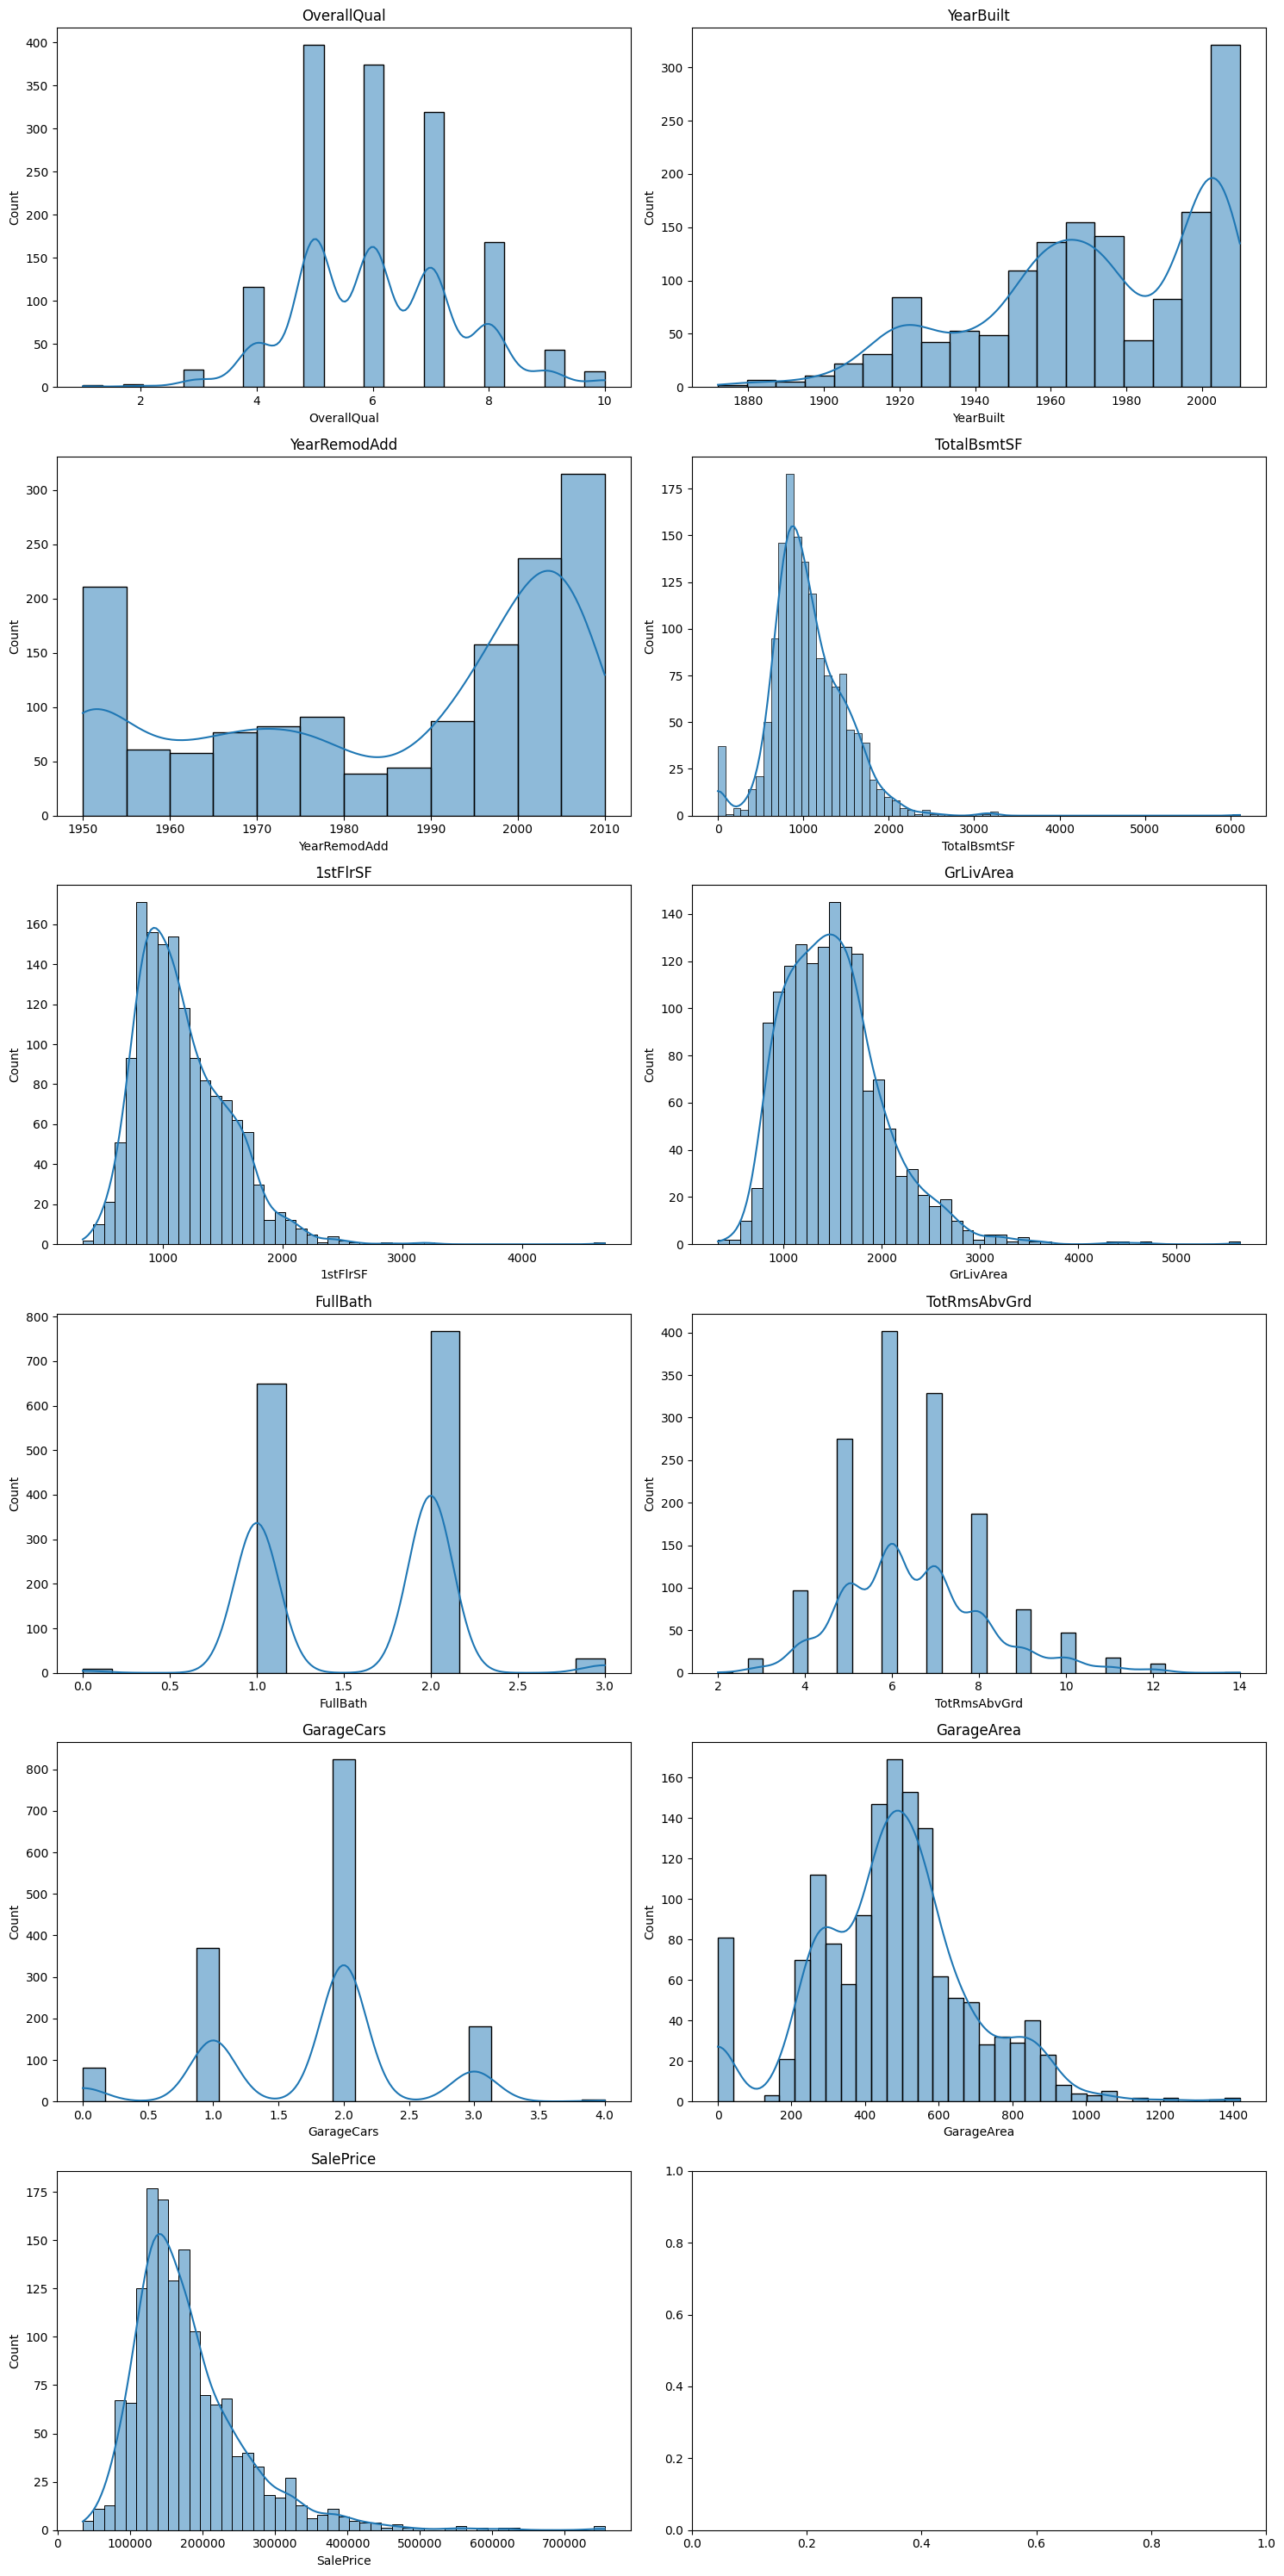

In [33]:
#lets see the univariate analysis of the variables
cols=2
num_vars=len(house_data.columns)
num_rows=6

fig, axes =plt.subplots(nrows=len(house_data.columns)//cols + 1,ncols=cols,figsize=(15,5*num_rows))

for i,column in enumerate(house_data.columns):
    row=i //cols
    col=i % cols

    sns.histplot(data=house_data,x=column,kde=True,ax=axes[row,col])
    axes[row,col].set_title(f'{column}')
plt.tight_layout()
plt.show()


From the above we can see that some variables are noramlly distributed,others are positively and negatively skewed and some have leptokurtic kurtosis.***We shall revisit

Bivariate analysis
Lets see how the predictor variables relate with the target variable..SalePrice

We use scatterplots to visualize these relationships

In [34]:
predictor_variables=house_data.columns
print(predictor_variables)

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


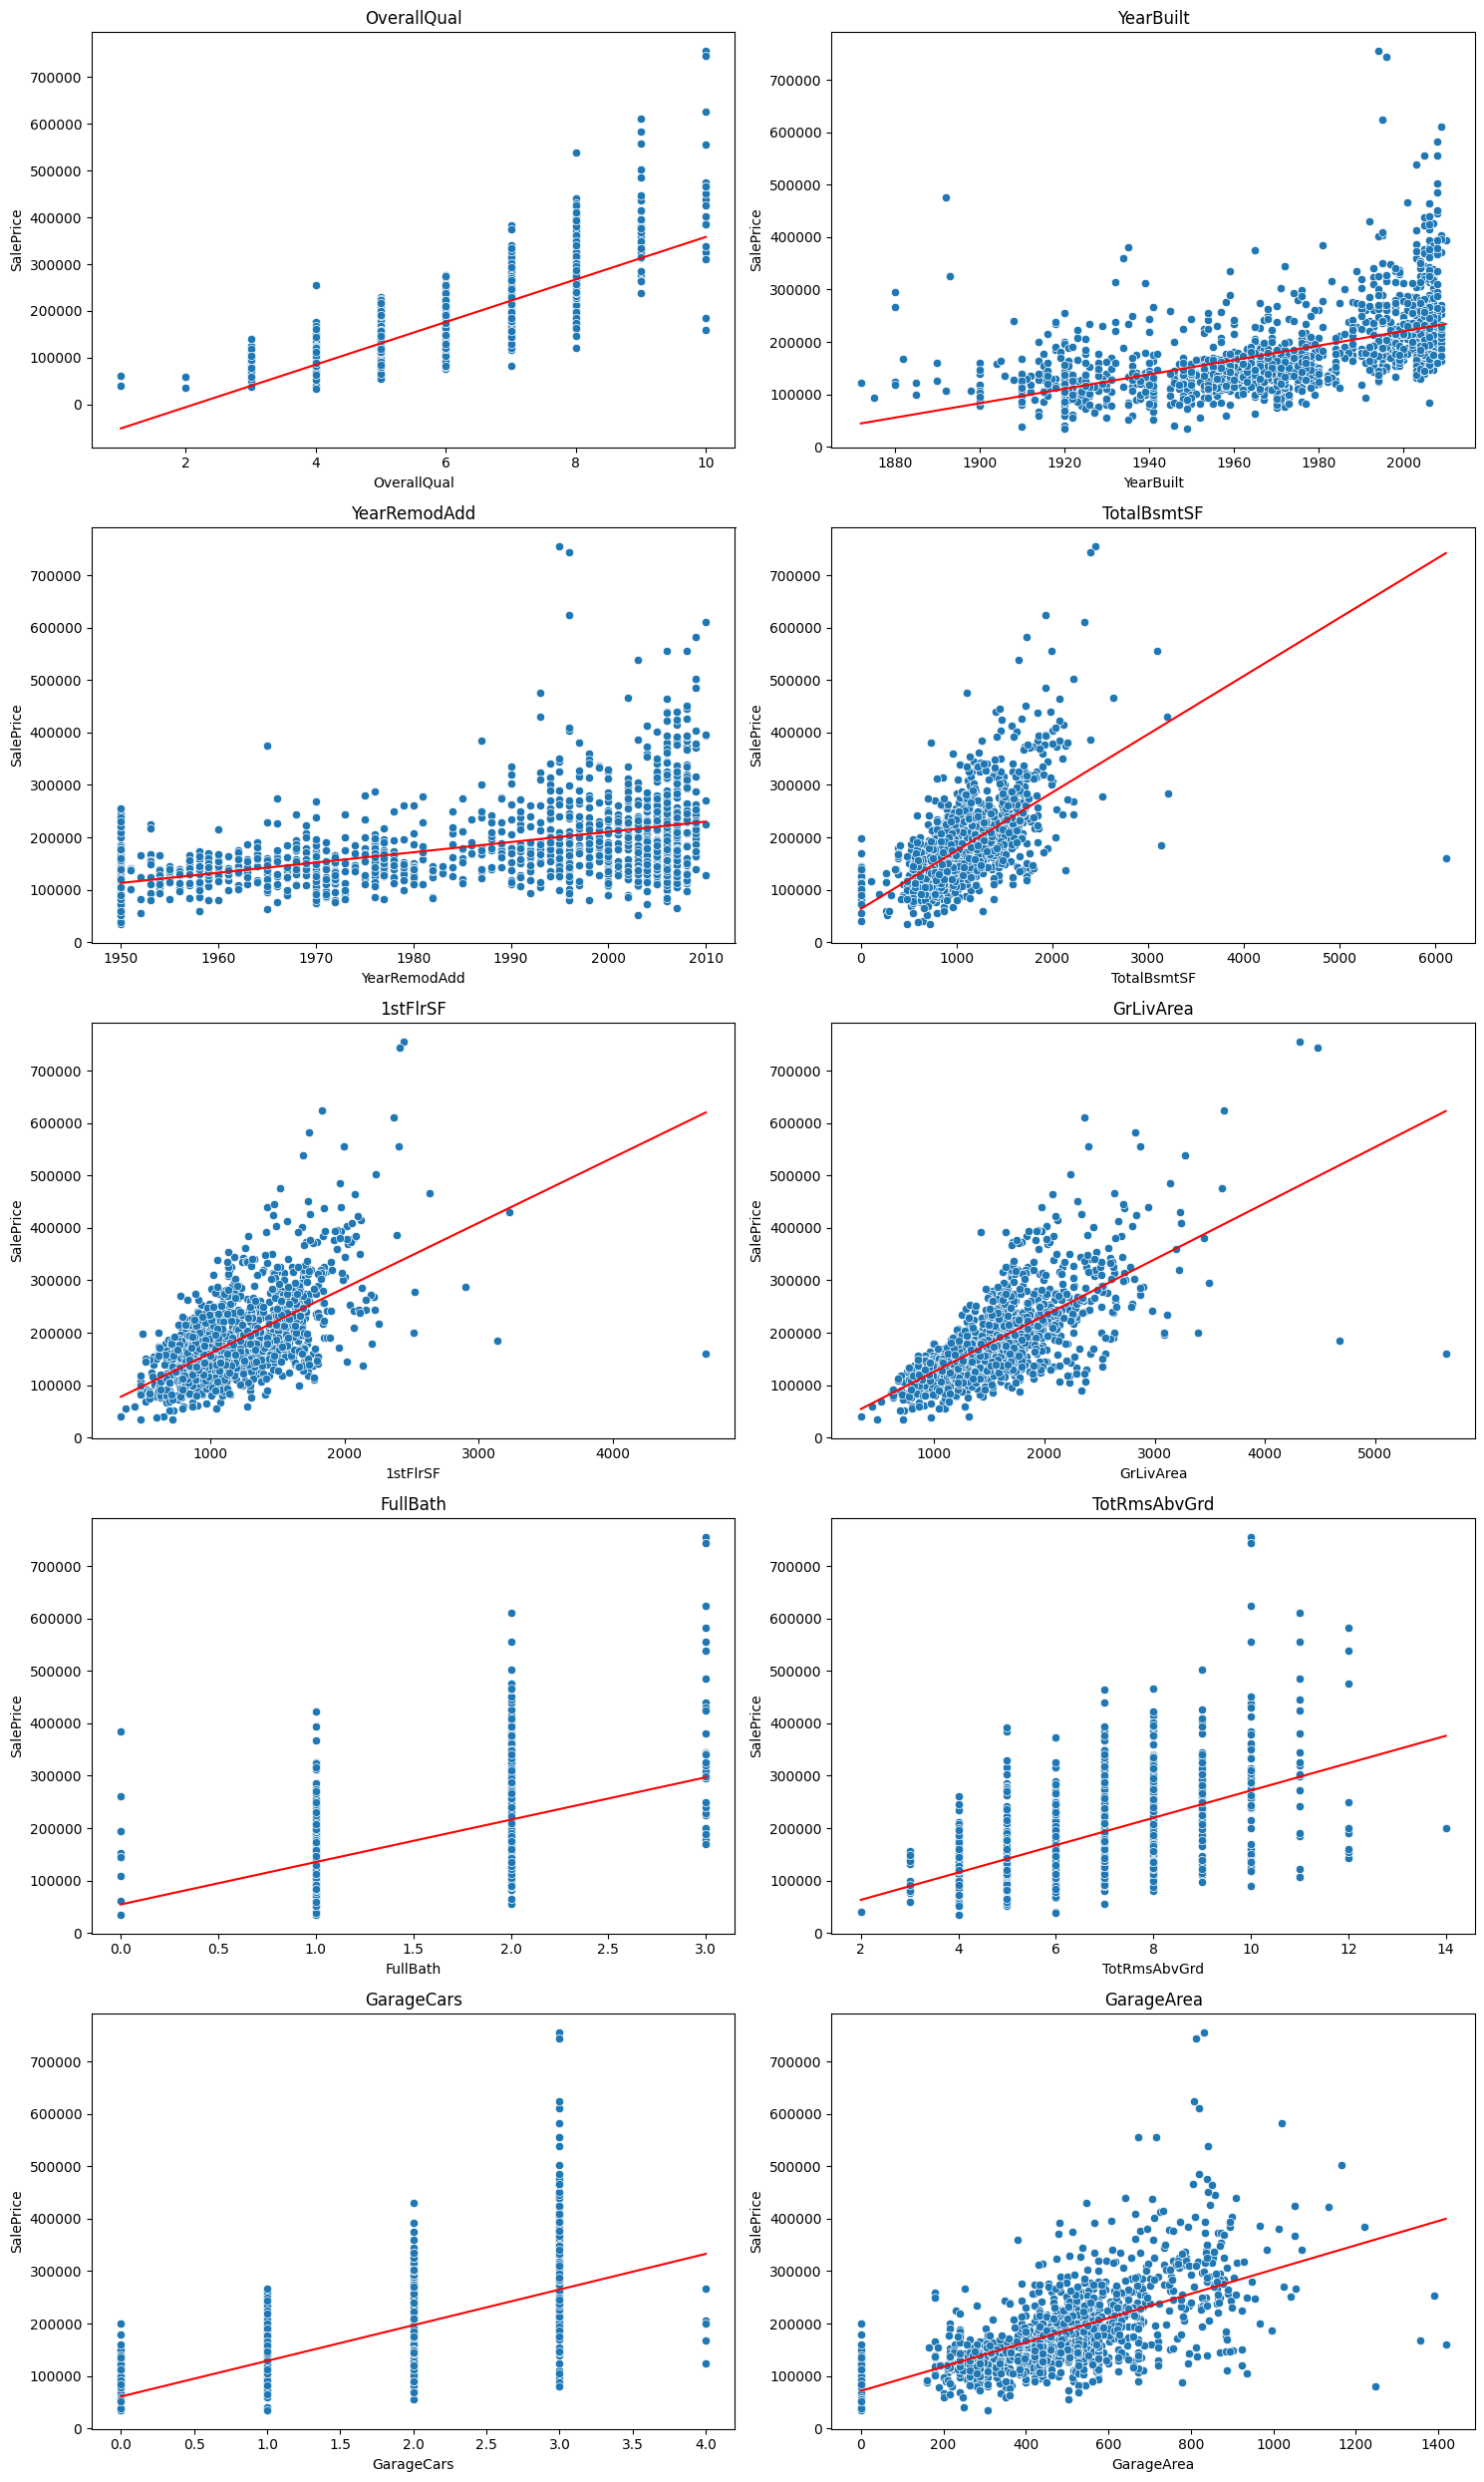

In [39]:
cols=2
num_vars=len(house_data.columns) - 1
num_rows=5

fig, axes =plt.subplots(nrows=5,ncols=cols,figsize=(15,5*num_rows))

for i,column in enumerate(house_data.columns):
   if column != 'SalePrice':
    row=i //cols
    col=i % cols
    coefficients=np.polyfit(house_data[column],house_data['SalePrice'],1)
    x_regression=np.linspace(
        min(house_data[column]),max(house_data[column]),100)
    y_regression= np.polyval(coefficients,x_regression)
    sns.scatterplot(data=house_data,x=column,y='SalePrice',ax=axes[row,col]) 
    axes[row,col].plot(x_regression,y_regression,color='red')
    axes[row,col].set_title(f'{column}')
plt.tight_layout()
plt.show()  

In [55]:
test_data.head()

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,Target
0,5,1961,1961,882.0,896,896,1,5,1.0,730.0,110256.843790
1,6,1958,1958,1329.0,1329,1329,1,6,1.0,312.0,156469.882994
2,5,1997,1998,928.0,928,1629,2,6,2.0,482.0,169495.206846
3,6,1998,1998,926.0,926,1604,2,7,2.0,470.0,188446.349300
4,8,1992,1992,1280.0,1280,1280,2,5,2.0,506.0,218616.369307


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [41]:
X=house_data.drop('SalePrice',axis=1)
Y=house_data['SalePrice']

In [43]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [44]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [46]:
r2_score=model.score(X_test,Y_test)
print(f"R^2 score: {r2_score}")

R^2 score: 0.7968483304281098


In [52]:
Id=test['Id']
Id.head()

0    1461
1    1462
2    1463
3    1464
4    1465
Name: Id, dtype: int64

In [49]:
#get the predicted result for the test data
test_data.Id=model.predict(X)

In [58]:
submissionFile=pd.DataFrame({"Id":test["Id"],"Target":test_data.Target})
submissionFile.head()

,Id,Target
0,1461,110256.843790
1,1462,156469.882994
2,1463,169495.206846
3,1464,188446.349300
4,1465,218616.369307


In [59]:
submissionFile.to_csv("Mysubmission.csv",index=False)